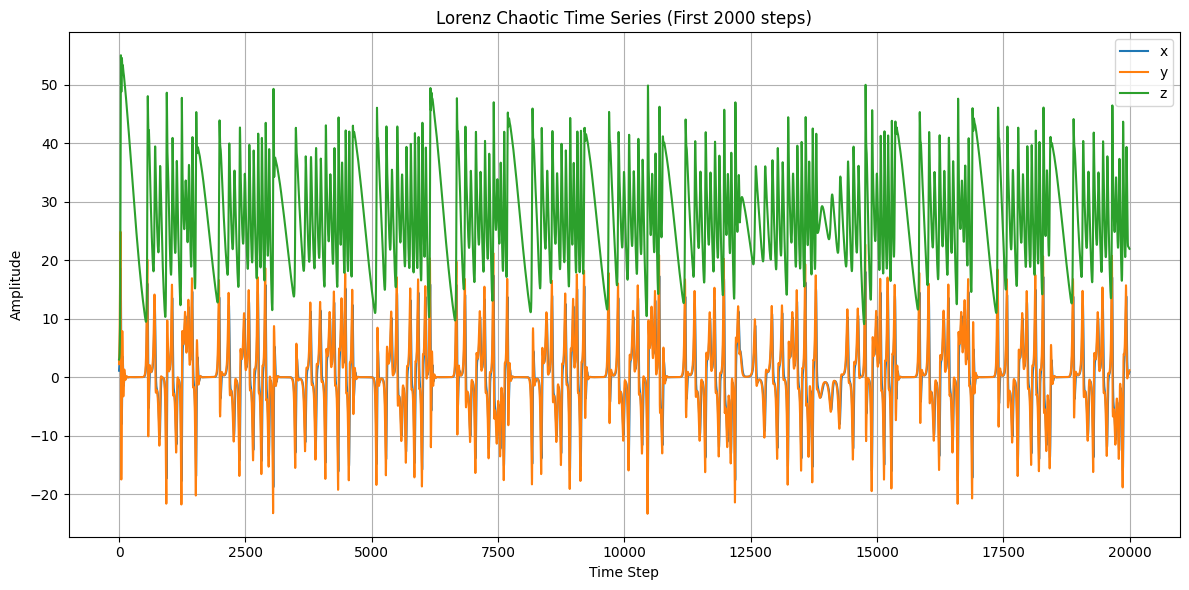

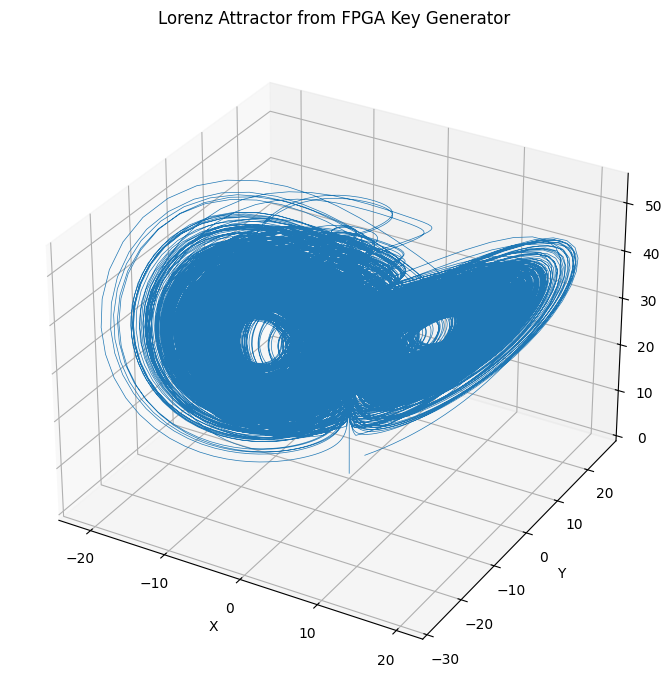

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fixed-point scale factor (2^20)
SCALE = 2 ** 20

# Time step T = 0.01 scaled to fixed point
T_fp = int(0.01 * SCALE)

# Default constants (scaled)
a_base = int(10.0 * SCALE)
b_base = int(28.0 * SCALE)
c_base = int(0.083 * SCALE)

# Initial values (scaled)
x = int(1.0 * SCALE)
y = int(2.0 * SCALE)
z = int(3.0 * SCALE)

# Load 8-bit input key list
with open("gradient_key_all.txt", "r") as f:
    keys = [int(line.strip(), 16) for line in f.readlines()]

n_steps = 200_000
x_list, y_list, z_list = [], [], []

# Cycle through the key list
key_index = 0

for i in range(n_steps):
    key = keys[key_index % len(keys)]
    key_index += 1

    # Perturb parameters with key
    a = a_base + (key << 12)
    b = b_base + (key << 12)
    c = c_base + (key << 12)

    # Euler method (fixed-point arithmetic emulation)
    dx = ((a * (y - x) // SCALE) * T_fp) // SCALE
    dy = (((b * x // SCALE - (x * z // SCALE) - y) * T_fp) // SCALE)
    dz = (((x * y // SCALE - (c * z // SCALE)) * T_fp) // SCALE)

    x += dx
    y += dy
    z += dz

    x_list.append(x)
    y_list.append(y)
    z_list.append(z)

# Convert back to float for plotting
x_float = np.array(x_list) / SCALE
y_float = np.array(y_list) / SCALE
z_float = np.array(z_list) / SCALE

# Time series plot
plt.figure(figsize=(12, 6))
plt.plot(x_float[:20000], label='x')
plt.plot(y_float[:20000], label='y')
plt.plot(z_float[:20000], label='z')
plt.title("Lorenz Chaotic Time Series (First 2000 steps)")
plt.xlabel("Time Step")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# 3D Attractor Plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_float, y_float, z_float, lw=0.5)
ax.set_title("Lorenz Attractor from FPGA Key Generator")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.tight_layout()
plt.show()
